<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing a DataSet**

In [2]:
data = pd.read_csv("/content/Loan status Prediction.csv")

**Data Preprocessing**

In [3]:
# Top 5 Rows Of DataSet
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Last 5 Rows Of DataSet
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Number of Rows and Columns
data.shape
print("Number of Rows: ",data.shape[0])
print("Number of Columns: ",data.shape[1])

Number of Rows:  614
Number of Columns:  13


In [6]:
# Data Types
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Getting Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Statistical Method**

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Value Counts
# It Is Not Imbalanced Learning
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

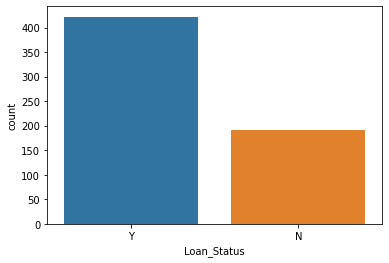

In [10]:
sns.countplot(x="Loan_Status",data=data)

**Dropping Duplicates**

In [11]:
dup_data = data.duplicated().any()

In [12]:
print("Any Duplicates Values: ",dup_data)

Any Duplicates Values:  False


In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data.shape

(480, 13)

In [17]:
del data["Loan_ID"]

**Data Encoding**

In [18]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
# Convert Loan Status Categorical Value to Numerical Value
data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [20]:
# Dependent column values
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [21]:
data = data.replace(to_replace="3+",value=4)

In [22]:
# dependent values
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [23]:
# Convert Categorical Columns to Numerical Values
data.replace({"Gender":{"Male":1,"Female":0},"Married":{"No":0,"Yes":1},"Education":{"Graduate":1,"Not Graduate":0},"Self_Employed":{"No":0,"Yes":1},"Property_Area":{"Rural":1,"Semiurban":2,"Urban":3}},inplace=True)

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1


**EDA**

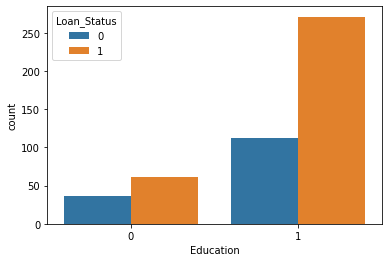

In [25]:
# Education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=data)

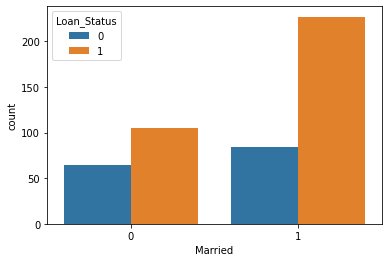

In [26]:
# Marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=data)

**Separating a Data**

In [27]:
X = data.drop(columns="Loan_Status",axis=1)
y = data["Loan_Status"]

**Train And Test Split**

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (360, 11) (120, 11)


**Modelling**

Support Vector Machine Model

In [30]:
from sklearn import svm
svm = svm.SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

**Evaluation Metrics**

Prediction

In [31]:
y_pred = svm.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [32]:
svm.coef_

array([[ 1.26207432e+00, -8.50399547e-01,  2.31311509e+00,
         1.62821758e+00,  5.88712603e-02, -2.35620309e-03,
        -1.03156970e-03,  4.63758350e-02, -1.48415134e-02,
         1.70253242e+01,  7.98646260e-01]])

In [33]:
svm.intercept_

array([-2.52240845])

In [34]:
# Comparision of Actual and Prediction Value
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
300,0,0
8,1,1
430,1,1
519,0,1
94,1,1
...,...,...
209,0,1
91,1,1
235,1,1
257,0,1


In [35]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

In [36]:
# Accuracy Score
Accuracy_Score = svm.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.725


In [37]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[15, 22],
       [11, 72]])

In [38]:
# f1 score
F1_Score = f1_score(y_test,y_pred)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8135593220338984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


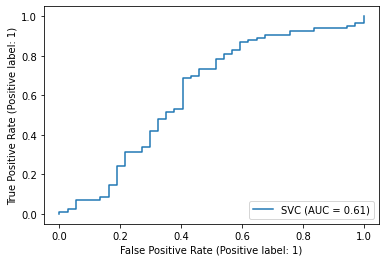

In [39]:
# AUROC Score
plot_roc_curve(svm,X_test,y_test)